# Check data

In [1]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('drive/My Drive/Colab Notebooks/practice/proj')

In [22]:
# 데이터 불러오기 및 훑어보기(info)

test = pd.read_csv('./test_final.csv')
train = pd.read_csv('./train_final2.csv')
bus = pd.read_csv('./bus_bts.csv')
region = pd.read_excel('./region_code.xlsx')

train.info(), region.info(), bus.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    415423 non-null  int64  
 1   id            415423 non-null  int64  
 2   date          415423 non-null  object 
 3   bus_route_id  415423 non-null  int64  
 4   in_out        415423 non-null  int64  
 5   station_code  415423 non-null  int64  
 6   station_name  415423 non-null  object 
 7   latitude      415423 non-null  float64
 8   longitude     415423 non-null  float64
 9   18~20_ride    415423 non-null  int64  
 10  weekday       415423 non-null  int64  
 11  6~8ride       415423 non-null  int64  
 12  8~10ride      415423 non-null  int64  
 13  10~12ride     415423 non-null  int64  
 14  6~8off        415423 non-null  int64  
 15  8~10off       415423 non-null  int64  
 16  10~12off      415423 non-null  int64  
 17  기온(°C)        415423 non-null  float64
 18  강수량(

(None, None, None, None)

In [23]:
# train 데이터 확인

train

,Unnamed: 0,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,18~20_ride,weekday,6~8ride,8~10ride,10~12ride,6~8off,8~10off,10~12off,기온(°C),강수량(mm)
0,0,0,2019-09-01,4270000,0,344,제주썬호텔,33.48990,126.49373,0,6,1,7,8,0,0,0,24.650000,0.0
1,1,1,2019-09-01,4270000,0,357,한라병원,33.48944,126.48508,5,6,5,6,11,0,0,0,24.650000,0.0
2,2,2,2019-09-01,4270000,0,432,정존마을,33.48181,126.47352,2,6,2,2,0,0,0,0,24.650000,0.0
3,3,3,2019-09-01,4270000,1,1579,제주국제공항(600번),33.50577,126.49252,53,6,17,32,30,0,0,0,24.650000,0.0
4,4,4,2019-09-01,4270000,1,1646,중문관광단지입구,33.25579,126.41260,0,6,0,0,0,0,1,0,24.650000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,415418,2019-09-30,32820000,1,1129,한림환승정류장(한림리),33.41437,126.26336,0,0,4,0,0,0,0,0,23.866667,0.0
415419,415419,415419,2019-09-30,32820000,1,1564,제주시외버스터미널,33.49946,126.51479,0,0,4,0,0,0,0,0,23.866667,0.0
415420,415420,415420,2019-09-30,32820000,1,2322,해병부대,33.23100,126.26273,0,0,0,0,0,1,0,0,23.866667,0.0
415421,415421,415421,2019-09-30,32820000,1,3291,애월환승정류장(애월리),33.46483,126.31870,0,0,1,0,0,0,0,0,23.866667,0.0


In [24]:
# Test 데이터 확인

test

,Unnamed: 0,Unnamed: 0.1,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,weekday,6~8ride,8~10ride,10~12ride,6~8off,8~10off,10~12off,기온(°C),강수량(mm)
0,0,0,415423,2019-10-01,4270000,0,344,제주썬호텔,33.48990,126.49373,1,8,9,10,0,0,1,24.766667,0.183333
1,1,1,415424,2019-10-01,4270000,0,357,한라병원,33.48944,126.48508,1,7,7,19,0,0,0,24.766667,0.183333
2,2,2,415425,2019-10-01,4270000,0,432,정존마을,33.48181,126.47352,1,6,4,3,0,0,0,24.766667,0.183333
3,3,3,415426,2019-10-01,4270000,1,1579,제주국제공항(600번),33.50577,126.49252,1,12,26,46,0,0,0,24.766667,0.183333
4,4,4,415427,2019-10-01,4270000,1,1636,롯데호텔,33.24872,126.41032,1,0,0,0,0,1,0,24.766667,0.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228165,228165,228165,643588,2019-10-16,32820000,1,786,고산환승정류장(고산1리),33.30073,126.18044,2,0,0,0,3,0,0,17.983333,0.000000
228166,228166,228166,643589,2019-10-16,32820000,1,1080,애월고등학교,33.46262,126.33447,2,0,0,0,1,0,0,17.983333,0.000000
228167,228167,228167,643590,2019-10-16,32820000,1,1129,한림환승정류장(한림리),33.41437,126.26336,2,3,0,0,0,0,0,17.983333,0.000000
228168,228168,228168,643591,2019-10-16,32820000,1,1564,제주시외버스터미널,33.49946,126.51479,2,3,0,0,0,0,0,17.983333,0.000000


In [25]:
# Bus 데이터 확인

bus

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409409,6.573162e+15,30420000,149797565,2019-10-16,07:08:31,1937,L마트,NaN,NaN,NaN,NaN,1,1
2409410,9.441160e+15,30420000,149797565,2019-10-16,07:16:31,1908,한라산교회,NaN,NaN,NaN,NaN,1,1
2409411,9.446038e+15,25070000,149797565,2019-10-16,08:29:05,1882,고도농원,NaN,NaN,NaN,NaN,1,1
2409412,4.309690e+15,25070000,149797565,2019-10-16,08:40:32,1938,주공아파트5단지,NaN,NaN,NaN,NaN,1,1


# Data Preprocessing

In [0]:
train.columns, test.columns

(Index(['Unnamed: 0', 'id', 'date', 'bus_route_id', 'in_out', 'station_code',
        'station_name', 'latitude', 'longitude', '18~20_ride', 'weekday',
        '6~8ride', '8~10ride', '10~12ride', '6~8off', '8~10off', '10~12off',
        '기온(°C)', '강수량(mm)'],
       dtype='object'),
 Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'date', 'bus_route_id', 'in_out',
        'station_code', 'station_name', 'latitude', 'longitude', 'weekday',
        '6~8ride', '8~10ride', '10~12ride', '6~8off', '8~10off', '10~12off',
        '기온(°C)', '강수량(mm)'],
       dtype='object'))

In [0]:
# Unuseful data dropping
inputvar= ['bus_route_id','station_code','in_out','latitude','longitude','6~8ride', '8~10ride', '10~12ride', '6~8off', '8~10off', '10~12off',
        'weekday', '기온(°C)', '강수량(mm)']
target = ['18~20_ride']

tr_data = train[inputvar]
tr_target = train[target]
te_data = test[inputvar]



In [27]:
# variables split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tr_data,tr_target,test_size = 0.3)

# tr_data.shape, tr_target.shape, te_data.shape
x_train.shape, y_train.shape, x_test.shape

((290796, 14), (290796, 1), (124627, 14))

# Data Analyze
- Regression : Random Forest Regression
- Classifier : Voting Classifier, Random Forest Classifier

## Random Forest - GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# param_grid = {
#     'max_features': [2,3,5],
#     'min_samples_leaf': [2,3],
#     'min_samples_split': [2,4,6],
#     'n_estimators': [100, 200,500]
# }

# # Create a based model
# rf = RandomForestRegressor(random_state=1217)

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)

# import numpy as np
# grid_search.fit(x_train, y_train.values.ravel())
# grid_search.best_params_

In [29]:
rf = RandomForestRegressor(max_features=3,min_samples_leaf=2,min_samples_split=2,n_estimators=100,random_state=1217)
rf.fit(x_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1217, verbose=0, warm_start=False)

No handles with labels found to put in legend.


0.6732923134437312

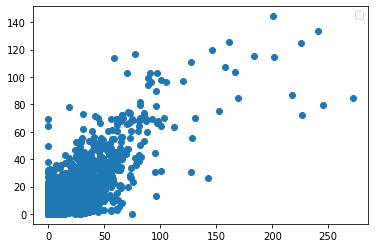

In [33]:
g_prediction = rf.predict(x_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, g_prediction)
# z = np.polyfit(y_test, g_prediction, 1)
# p = np.poly1d(z)
# plt.plot(y_test,p(y_test),"r--")
rf.score(x_test, y_test)

from sklearn import metrics
metrics.r2_score(y_test, g_prediction)



## Classifier

### Clustering

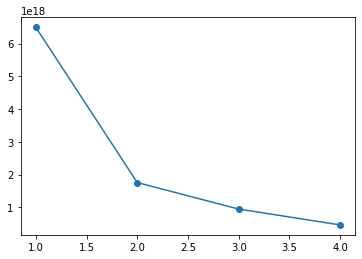

In [0]:
# KMeans - decide how many cluster to make

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []

for i in range(1,5):
  kmeans = KMeans(n_clusters=i, n_init=10,max_iter=300)
  kmeans.fit(tr_data)
  distortions.append(kmeans.inertia_)
plt.plot(range(1,5), distortions, marker='o')
plt.show()

In [34]:
# silhouette
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=300)
y_pred = kmeans.fit_predict(tr_data)

from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(tr_data, labels=kmeans.labels_)

0.7221563009979349

In [35]:
bus_cls = tr_data # bus stop data

bus_cls['group'] = kmeans.labels_ # adding cluster value

bus_cls

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,bus_route_id,station_code,in_out,latitude,longitude,6~8ride,8~10ride,10~12ride,6~8off,8~10off,10~12off,weekday,기온(°C),강수량(mm),group
0,4270000,344,0,33.48990,126.49373,1,7,8,0,0,0,6,24.650000,0.0,0
1,4270000,357,0,33.48944,126.48508,5,6,11,0,0,0,6,24.650000,0.0,0
2,4270000,432,0,33.48181,126.47352,2,2,0,0,0,0,6,24.650000,0.0,0
3,4270000,1579,1,33.50577,126.49252,17,32,30,0,0,0,6,24.650000,0.0,0
4,4270000,1646,1,33.25579,126.41260,0,0,0,0,1,0,6,24.650000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,32820000,1129,1,33.41437,126.26336,4,0,0,0,0,0,0,23.866667,0.0,1
415419,32820000,1564,1,33.49946,126.51479,4,0,0,0,0,0,0,23.866667,0.0,1
415420,32820000,2322,1,33.23100,126.26273,0,0,0,1,0,0,0,23.866667,0.0,1
415421,32820000,3291,1,33.46483,126.31870,1,0,0,0,0,0,0,23.866667,0.0,1


### Voting Classifier

In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(tr_data,bus_cls['group'],random_state=77)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

clflog = LogisticRegression(random_state=1)
clrfc = RandomForestClassifier(random_state=1)
clfgn = GaussianNB()

In [40]:
# from sklearn.ensemble import VotingClassifier
# eclf_h = VotingClassifier(estimators=[('lr',clflog),('rfc',clrfc),('gnb',clfgn)], voting='hard')
# eclf_s = VotingClassifier(estimators=[('lr',clflog),('rfc',clrfc),('gnb',clfgn)], voting='soft')

# models = [clflog, clrfc, clfgn, eclf_h, eclf_s]

for model in models:
  model.fit(x1_train, y1_train)
  predictions = model.predict(x1_test)
  score = model.score(x1_test, y1_test)
  print(score)

0.5462219262278639
1.0
0.9961565310887689
0.9974564099272228
0.9974564099272228


#### GridSearchCV

In [0]:
c_params = [0.1,5.0,7.0,10.0,15.0,20.0,100.0]
params = {
    'lr__solver': ['liblinear', 'saga','lbfgs'], 'lr__penalty':['l2'], 'lr__C':c_params,
    'rfc__criterion':['gini','entropy'],
    'rfc__max_depth':[10,8,7,6,5,4,3,2],
    'rfc__min_samples_leaf':[1,2,3,4,5,6,7,8,9]
}

In [0]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = eclf_h, param_grid = params, cv=5)
grid = grid.fit(tr_data,bus_cls['group'])
grid.best_params_

### Random Forest Classifier

In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(tr_data,bus_cls['group'],test_size = 0.3)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predict = tree.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

# ETC

## Connect Region name with train/test location by latitude and longitude

In [0]:
region.rename(columns = {'위도' : 'latitude'}, inplace = True)
region.rename(columns = {'경도' : 'longitude'}, inplace = True)
region.rename(columns = {'읍면동' : 'location'}, inplace = True)

region

,코드,시도,시군구,location,하위,latitude,longitude,코드종류
0,1111051500,서울특별시,종로구,청운효자동,NaN,37.584009,126.970626,H
1,1111053000,서울특별시,종로구,사직동,NaN,37.575408,126.965944,H
2,1111054000,서울특별시,종로구,삼청동,NaN,37.590758,126.980996,H
3,1111055000,서울특별시,종로구,부암동,NaN,37.594768,126.965574,H
4,1111056000,서울특별시,종로구,평창동,NaN,37.613029,126.974485,H
...,...,...,...,...,...,...,...,...
22214,5013032022,제주특별자치도,서귀포시,표선면,하천리,33.348068,126.832421,B
22215,5013032023,제주특별자치도,서귀포시,표선면,성읍리,33.393144,126.794822,B
22216,5013032024,제주특별자치도,서귀포시,표선면,가시리,33.354784,126.771072,B
22217,5013032025,제주특별자치도,서귀포시,표선면,세화리,33.321147,126.798867,B


In [0]:
# Region 데이터 - 사용하지 않는 컬럼 제거
region.drop(columns='하위', axis=1)

region['geo'] = np.round(region['latitude'],2).astype(str) + np.round(region['longitude'],2).astype(str)
train['geo'] =  np.round(train['latitude'],2).astype(str) + np.round(train['longitude'],2).astype(str)

region, train

(               코드       시도   시군구  ...   longitude 코드종류          geo
 0      1111051500    서울특별시   종로구  ...  126.970626    H  37.58126.97
 1      1111053000    서울특별시   종로구  ...  126.965944    H  37.58126.97
 2      1111054000    서울특별시   종로구  ...  126.980996    H  37.59126.98
 3      1111055000    서울특별시   종로구  ...  126.965574    H  37.59126.97
 4      1111056000    서울특별시   종로구  ...  126.974485    H  37.61126.97
 ...           ...      ...   ...  ...         ...  ...          ...
 22214  5013032022  제주특별자치도  서귀포시  ...  126.832421    B  33.35126.83
 22215  5013032023  제주특별자치도  서귀포시  ...  126.794822    B  33.39126.79
 22216  5013032024  제주특별자치도  서귀포시  ...  126.771072    B  33.35126.77
 22217  5013032025  제주특별자치도  서귀포시  ...  126.798867    B   33.32126.8
 22218  5013032026  제주특별자치도  서귀포시  ...  126.774678    B  33.32126.77
 
 [22219 rows x 9 columns],
             id        date  ...  18~20_ride          geo
 0            0  2019-09-01  ...         0.0  33.49126.49
 1            1  2019-09-01

In [0]:
# Train 에 읍면동(지역) 정보 넣기
# train.join(region.set_index('geo')['location'], on='geo')

train1 = pd.merge(train, region[['geo', 'location']], on = ['geo'], how = 'left')

In [0]:
train2 = train1.drop_duplicates(['id'], keep=False)

In [0]:
train2[train2['location'].isnull()]

NameError: ignored

## To SQL (DB)

In [0]:
# sqlite로 db 파일 만들기

import sqlite3

conn = sqlite3.connect('PROJ_bus.db')

In [0]:
# DataFrame을 db에 테이블로 넣기

region.to_sql('region_table', conn, if_exists= 'replace')
train.to_sql('train_table', conn, if_exists= 'replace')